In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm
import h5py
import swordfish as sf
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
%matplotlib inline

/usr/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mlist = np.logspace(1, 3.9, 50)
ULXe100T = np.array([  1.65528658e-09,   9.60957671e-10,   6.49005131e-10,   4.83063812e-10,
   3.84792098e-10,   3.22501818e-10,   2.81484337e-10,   2.54126901e-10,
   2.36110515e-10,   2.24814585e-10,   2.18564646e-10,   2.16251578e-10,
   2.17120986e-10,   2.20648933e-10,   2.26467084e-10,   2.34316188e-10,
   2.44016344e-10,   2.55447234e-10,   2.68534590e-10,   2.83240506e-10,
   2.99556399e-10,   3.17497866e-10,   3.37100918e-10,   3.58419248e-10,
   3.81522269e-10,   4.06493746e-10,   4.33430885e-10,   4.62443777e-10,
   4.93655131e-10,   5.27200231e-10,   5.63227085e-10,   6.01896738e-10,
   6.43383715e-10,   6.87876600e-10,   7.35578719e-10,   7.86708933e-10,
   8.41502536e-10,   9.00212246e-10,   9.63109306e-10,   1.03048467e-09,
   1.10265033e-09,   1.17994067e-09,   1.26271406e-09,   1.35135442e-09,
   1.44627303e-09,   1.54791041e-09,   1.65673834e-09,   1.77326205e-09,
   1.89802256e-09,   2.03159918e-09])
    
ULXe1T = np.array([  1.26408117e-08,   7.10885208e-09,  4.66082009e-09,   3.38418409e-09,
   2.64479364e-09,   2.18545758e-09,   1.88681829e-09,   1.68783263e-09,
   1.55484103e-09,   1.46831632e-09,   1.41643243e-09,   1.39164268e-09,
   1.38880724e-09,   1.40431408e-09,   1.43549673e-09,   1.48043250e-09,
   1.53774888e-09,   1.60649720e-09,   1.68606101e-09,   1.77609159e-09,
   1.87644990e-09,   1.98716892e-09,   2.10842463e-09,   2.24051489e-09,
   2.38384413e-09,   2.53891268e-09,   2.70630944e-09,   2.88670727e-09,
   3.08086041e-09,   3.28960365e-09,   3.51385269e-09,   3.75460578e-09,
   4.01294623e-09,   4.29004573e-09,   4.58716851e-09,   4.90567615e-09,
   5.24703304e-09,   5.61281253e-09,   6.00470367e-09,   6.42451866e-09,
   6.87420087e-09,   7.35583360e-09,   7.87164955e-09,   8.42404096e-09,
   9.01557062e-09,   9.64898361e-09,   1.03272200e-08,   1.10534283e-08,
   1.18309802e-08,   1.26634861e-08])

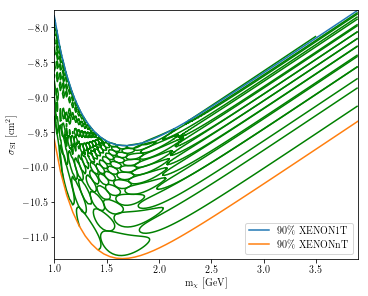

In [12]:
import matplotlib.cm as cm
from random import randint
from random import *


mp = 0.938 # GeV
mu = mlist*mp/(mlist + mp)

root01 = h5py.File('../hdf5/Xenon100T_gridscan01_Euclideanized_dRdS1.hdf5')
ES01 = np.array(root01['ES'])
couplings01 = np.array(root01['c'])
mass01 = np.array(root01['mass'])

c01 = np.zeros([couplings01.shape[0], couplings01.shape[1]+1])
c01[:,0] = mass01
c01[:,1:] = couplings01

mu1 = mass01*mp/(mass01 + mp)
couplings01[:,0] = (couplings01[:,0])**2 * (mu1**2/np.pi) * (1.98e-14**2)

sh = sf.SignalHandler(c01, ES01)
Nsigmalow = 135
Nsigmahigh = 8

colors = iter(cm.inferno(np.random.uniform(0, 1, Nsigmalow+Nsigmahigh)))

def plot_ellipse(ind, x=False, colour=False):
    P0 = c01[ind,:]
    #pp, el_ind = sh.query_region(P0, 2.0, return_indices = True)
    pp2, el_ind2, d2 = sh.query_region(P0, 3., return_distance = True)
    pp, el_ind = sh.query_region(P0, 2., return_indices = True)
    if x:
        plt.plot(mass01[ind], couplings01[ind,0], 'x', color='k')
    elif colour:
        #plt.scatter(np.log10(mass01[el_ind]), np.log10(couplings01[el_ind,0]*1e36), color='r',
        #                 alpha = 0.1, rasterized=True, s = 15)
        z = np.ones_like(mass01[el_ind2])
        x = mass01[el_ind2]
        y = couplings01[el_ind2,0]
        plt.tricontour(np.log10(x), np.log10(y*1e36), d2, colors=['green', 'green'], levels=[0, 1,])

b = sh.get_benchmarks2(sigma=1.0)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

for i in b:
    plot_ellipse(i, colour=True)

sig_SI_X1T = (ULXe1T)**2 * (mu**2/np.pi) * (1.98e-14**2)
sig_SI_X100T = (ULXe100T)**2 * (mu**2/np.pi) * (1.98e-14**2)


plt.plot(np.log10(mlist), np.log10(sig_SI_X1T*1e36), label=r"90\% XENON1T")
plt.plot(np.log10(mlist), np.log10(sig_SI_X100T*1e36),label=r"90\% XENONnT")
plt.ylabel(r"$\sigma_{\mathrm{SI}}$ [$\mathrm{cm}^{2}$]")
plt.xlabel(r"$\mathrm{m}_{\chi}$ [$\mathrm{GeV}$]")
#plt.ylim(1e-48*1e36,1e-44*1e36)
#plt.xlim(10,10**3.9)
plt.legend()

plt.tight_layout(pad=0.3)
plt.savefig("../plots/operator_regions_sigma_SI.pdf", dpi=500)